# 1.전처리

In [28]:
# 기본 데이터 정리 및 처리
import numpy as np
import pandas as pd

# 시각화
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
plt.style.use('seaborn-whitegrid')

# 전처리
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import RobustScaler

# 경고 제거 (판다스가 에러 메세지를 자주 만들어 내기 때문에 이를 일단 무시하도록 설정합니다.)
import sys
import warnings

import warnings
warnings.filterwarnings('ignore')

# train, test 나누기
from sklearn.model_selection import train_test_split

In [29]:
df = pd.read_csv('bank-full.csv', sep =';')
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [30]:
df.loc[df['y'] == 'no', 'y'] = 0
df.loc[df['y'] == 'yes', 'y'] = 1
# object 타입을 int64 타입으로 바꿔주기
df['y'] = df['y'].astype('int64')

In [31]:
df.drop('poutcome', axis=1, inplace = True) # poutcome 변수 삭제

In [32]:
df.loc[df['job'] == 'unknown']

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,y
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,0
216,47,unknown,married,unknown,no,28,no,no,unknown,5,may,338,2,-1,0,0
354,59,unknown,divorced,unknown,no,27,no,no,unknown,5,may,347,3,-1,0,0
876,37,unknown,single,unknown,no,414,yes,no,unknown,7,may,131,1,-1,0,0
1072,29,unknown,single,primary,no,50,yes,no,unknown,7,may,50,2,-1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44714,45,unknown,married,tertiary,no,406,no,no,cellular,7,sep,314,1,-1,0,1
44742,64,unknown,married,unknown,no,2799,no,no,telephone,9,sep,378,4,-1,0,0
44970,28,unknown,single,unknown,no,326,no,no,cellular,11,oct,450,1,231,1,1
45141,77,unknown,married,unknown,no,397,no,no,telephone,8,nov,207,1,185,3,0


In [33]:
unknowndr1 = df[df['job'].str.contains('unknown')].index
df.drop(unknowndr1, inplace=True)

In [34]:
df.loc[df['job'] == 'unknown']

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,y


In [35]:
unknowndr2 = df[df['education'].str.contains('unknown')].index
df.drop(unknowndr2, inplace=True)

In [36]:
unknowndr3 = df[df['contact'].str.contains('unknown')].index
df.drop(unknowndr3, inplace=True)

In [37]:
df.reset_index(drop=True, inplace = True) #인덱스 재 정렬
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,y
0,27,management,single,secondary,no,35,no,no,cellular,4,jul,255,1,-1,0,0
1,54,blue-collar,married,primary,no,466,no,no,cellular,4,jul,297,1,-1,0,0
2,43,blue-collar,married,secondary,no,105,no,yes,cellular,4,jul,668,2,-1,0,0
3,31,technician,single,secondary,no,19,no,no,telephone,4,jul,65,2,-1,0,0
4,27,technician,single,secondary,no,126,yes,yes,cellular,4,jul,436,4,-1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30902,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,1
30903,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,1
30904,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,1
30905,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,0


In [38]:
# y 변수 저장
df_labels = df['y']

인코딩

In [39]:
#!pip install category_encoders
import category_encoders as ce

df_bi_cat = df[['month', 'job']]
df1 = ce.BinaryEncoder(cols = ['month']).fit_transform(df_bi_cat)
df2 = ce.BinaryEncoder(cols = ['job']).fit_transform(df1)

In [40]:
df_one_cat = df[['marital', 'education', 'default','housing',
       'loan', 'contact']] # month와 job을 제외한 범주형 변수 원핫인코딩

In [41]:
cat_pipeline = Pipeline([
    ('1hot_encoder', OneHotEncoder(sparse=False)),
    ])
df_cat_tr = cat_pipeline.fit_transform(df_one_cat)

In [42]:
df_std_big_num = df[['balance', 'duration', 'pdays']] # 표준편차가 큰 수치형 변수

In [43]:
num_pipeline = Pipeline([
        ('rb_scaler', RobustScaler()),
    ])

df_num_tr = num_pipeline.fit_transform(df_std_big_num)

In [44]:
from sklearn.compose import ColumnTransformer

num_attribs = list(df_std_big_num) #키들(컬럼명)만 list로 반환
cat_attribs = list(df_one_cat)

full_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_attribs),
        ("cat", cat_pipeline, cat_attribs),
    ])


In [45]:
full_df = pd.DataFrame(full_pipeline.fit_transform(df))

In [46]:
df_oth = df[['age', 'day', 'campaign', 'previous']] # 나머지 수치형 변수들

In [47]:
X = pd.concat([full_df,df2,df_oth], axis =1)
X

,0,1,2,3,4,5,6,7,8,9,...,month_2,month_3,job_0,job_1,job_2,job_3,age,day,campaign,previous
0,-0.307909,0.339450,0.000000,0.0,0.0,1.0,0.0,1.0,0.0,1.0,...,0,1,0,0,0,1,27,4,1,0
1,-0.004921,0.532110,0.000000,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,0,1,0,0,1,0,54,4,1,0
2,-0.258699,2.233945,0.000000,0.0,1.0,0.0,0.0,1.0,0.0,1.0,...,0,1,0,0,1,0,43,4,2,0
3,-0.319156,-0.532110,0.000000,0.0,0.0,1.0,0.0,1.0,0.0,1.0,...,0,1,0,0,1,1,31,4,2,0
4,-0.243937,1.169725,0.000000,0.0,0.0,1.0,0.0,1.0,0.0,1.0,...,0,1,0,0,1,1,27,4,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30902,0.247452,3.651376,0.000000,0.0,1.0,0.0,0.0,0.0,1.0,1.0,...,0,0,0,0,1,1,51,17,3,0
30903,0.882953,1.261468,0.000000,1.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0,0,1,0,0,1,71,17,2,0
30904,3.685062,4.339450,16.818182,0.0,1.0,0.0,0.0,1.0,0.0,1.0,...,0,0,1,0,0,1,72,17,5,3
30905,0.137083,1.500000,0.000000,0.0,1.0,0.0,0.0,1.0,0.0,1.0,...,0,0,0,0,1,0,57,17,4,0


In [48]:
data = pd.concat([full_df,df2,df_oth, df_labels], axis =1)
data

,0,1,2,3,4,5,6,7,8,9,...,month_3,job_0,job_1,job_2,job_3,age,day,campaign,previous,y
0,-0.307909,0.339450,0.000000,0.0,0.0,1.0,0.0,1.0,0.0,1.0,...,1,0,0,0,1,27,4,1,0,0
1,-0.004921,0.532110,0.000000,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,1,0,0,1,0,54,4,1,0,0
2,-0.258699,2.233945,0.000000,0.0,1.0,0.0,0.0,1.0,0.0,1.0,...,1,0,0,1,0,43,4,2,0,0
3,-0.319156,-0.532110,0.000000,0.0,0.0,1.0,0.0,1.0,0.0,1.0,...,1,0,0,1,1,31,4,2,0,0
4,-0.243937,1.169725,0.000000,0.0,0.0,1.0,0.0,1.0,0.0,1.0,...,1,0,0,1,1,27,4,4,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30902,0.247452,3.651376,0.000000,0.0,1.0,0.0,0.0,0.0,1.0,1.0,...,0,0,0,1,1,51,17,3,0,1
30903,0.882953,1.261468,0.000000,1.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0,1,0,0,1,71,17,2,0,1
30904,3.685062,4.339450,16.818182,0.0,1.0,0.0,0.0,1.0,0.0,1.0,...,0,1,0,0,1,72,17,5,3,1
30905,0.137083,1.500000,0.000000,0.0,1.0,0.0,0.0,1.0,0.0,1.0,...,0,0,0,1,0,57,17,4,0,0


In [49]:
normal = data.loc[data['y'] == 0]
anomaly = data.loc[data['y'] == 1]

In [50]:
# 행 shuffle 후 위에서 4513개 --> test
normal_shuffled=normal.sample(frac=1, random_state=3).reset_index(drop=True) #shuffling
normal_shuffled_test = normal_shuffled[:4513]
normal_shuffled_train = normal_shuffled[4513:]

In [51]:
# train에 쓰이는 정상 데이터 X, Y 구분
X_train = normal_shuffled_train[normal_shuffled_train.columns.difference(['y'])]
Y_train = normal_shuffled_train["y"]
X_train.shape

(21881, 29)

In [52]:
# test에 쓰이는 정상 데이터 X, Y 구분 (샘플링)
X_normal_shuffled_test = normal_shuffled_test[normal_shuffled_test.columns.difference(['y'])]
Y_normal_shuffled_test = normal_shuffled_test["y"]
X_normal_shuffled_test.shape

(4513, 29)

In [53]:
# test에 쓰이는 이상 데이터 X, Y 구분
X_anomaly = anomaly[anomaly.columns.difference(['y'])]
y_anomaly = anomaly["y"]
X_anomaly.shape

(4513, 29)

In [54]:
X_test = pd.concat([X_normal_shuffled_test, X_anomaly])
Y_test = pd.concat([Y_normal_shuffled_test, y_anomaly])

In [55]:
# 선형 상관성 존재하는 변수들 제거
X_train_lowcorr = X_train.drop([3, 5, 7, 9, 11, 13, 15, 'month_0', 'month_2'], axis=1)
#X_train_lowcorr

In [56]:
X_test_lowcorr = X_test.drop([3, 5, 7, 9, 11, 13, 15, 'month_0', 'month_2'], axis=1)
#X_test_lowcorr

In [57]:
X_data = pd.concat([X_train_lowcorr, X_test_lowcorr]).reset_index(drop=True)
#X_data

# 2. 재구축 기반 : PCA

sklearn 사이트 참고
https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html

In [58]:
!pip install pyod

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.decomposition import PCA
from pyod.models.pca import PCA

from sklearn.svm import OneClassSVM

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report, precision_score, recall_score

import tensorflow as tf

import seaborn as sns
sns.set_style('white')

import warnings
warnings.filterwarnings(action='ignore')

In [60]:
PCA = PCA()
PCA.fit(X_train_lowcorr)

PCA(contamination=0.1, copy=True, iterated_power='auto', n_components=None,
  n_selected_components=None, random_state=None, standardization=True,
  svd_solver='auto', tol=0.0, weighted=True, whiten=False)

In [61]:
# train data에 대한 예측 값(정상=0, 이상=1)
PCA_train_pred = PCA.predict(X_train_lowcorr) 
PCA_train_pred

array([0, 0, 0, ..., 0, 0, 0])

In [62]:
# test data에 대한 예측 값(정상=0, 이상=1)
PCA_test_pred = PCA.predict(X_test_lowcorr) 
PCA_test_pred

array([0, 0, 0, ..., 0, 1, 1])

accuracy:  0.5540660314646576
recall:  0.212
precision:  0.671
f1-score:  0.323


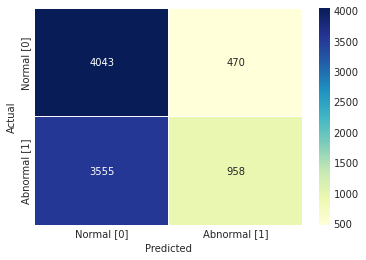

In [63]:
# Confusion matrix 출력 및 모델 성능 평가
con_mat = confusion_matrix(Y_test, PCA_test_pred)

sns.heatmap(pd.DataFrame(con_mat, columns = ['Predicted', 'Actual']),
            xticklabels=['Normal [0]', 'Abnormal [1]'], 
            yticklabels=['Normal [0]', 'Abnormal [1]'], 
            annot=True, fmt="d", linewidths=.5, cmap="YlGnBu")
plt.ylabel('Actual')
plt.xlabel('Predicted')

print("accuracy: ", accuracy_score(Y_test, PCA_test_pred))
print("recall: ", round(recall_score(Y_test, PCA_test_pred),3))
print("precision: ", round(precision_score(Y_test, PCA_test_pred),3))
print("f1-score: ", round(f1_score(Y_test, PCA_test_pred),3))

## novelty score & threshold

In [64]:
def multivariate_gaussian(dataset, mu, sigma):
    p = multivariate_normal(mean=mu, cov=sigma)
    return - 1.0 * p.logpdf(dataset)

In [65]:
# train/test 데이터의 -logpdf 값 도출
gauss_train = multivariate_gaussian(X_train, mu, sigma)
gauss_test = multivariate_gaussian(X_test, mu, sigma)

NameError: ignored

In [ ]:
#성능 평가
# def calculate_metric(y_true, y_pred):
#     cm = confusion_matrix(y_true, y_pred, labels=[1, 0])
#     tp, fn, fp, tn = cm.ravel()
    
#     frr = fp / (fp + tn)
#     far = fn / (fn + tp) 
    
#     f1 = f1_score(y_true, y_pred)

#     sns.heatmap(pd.DataFrame(cm, columns = ['Predicted', 'Actual']),
#             xticklabels=['Abnormal [1]', 'Normal [0]'], 
#             yticklabels=['Abnormal [1]', 'Normal [0]'], 
#             annot=True, fmt="d", linewidths=.5, cmap="YlGnBu")
#     plt.ylabel('Actual')
#     plt.xlabel('Predicted')
    
#     return frr, far, f1

In [ ]:
# # test 평가
# frr, far, f1 = calculate_metric(Y_test, ae_scores['anomaly'].iloc[len(ae_train):])

# print("**  FRR: {}  |  FAR: {}  |  F1 Score: {}".format(round(frr, 4), round(far, 4), round(f1, 4)))

# 3. 경계선 분류 기반 : 1-SVM & 1-SVM with SGD

In [68]:
#라이브러리 임포트
from sklearn.svm import SVC
from sklearn.svm import OneClassSVM
from sklearn.linear_model import SGDOneClassSVM
from sklearn.kernel_approximation import Nystroem
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV

## 1-SVM

In [74]:
# #파라미터 튜닝-> 
# grid_params = {'C': [0.1,1, 10, 100], 'gamma': [1,0.1,0.01,0.001],
#                'kernel': ['rbf', 'poly', 'sigmoid']}

In [75]:
# svm_gs = GridSearchCV(OneClassSVM(), grid_params, verbose = 1, cv=3, n_jobs = -1)

In [ ]:
#조사 해본 결과 1-svm에는 gridsearchCV 가 적용이 안되는 듯함. sklearn에서 제공을 안하는 듯
g_res = svm_gs.fit(X_train,Y_train)

In [ ]:
# print(g_res.best_score_)
# print(g_res.best_params_)

In [76]:
# 1-SVM hyperparameters
#hyperparameter 고정해두고 진행

nu = 0.05
gamma = 2.0

# Fit the One-Class SVM
OCSVM = OneClassSVM(gamma=gamma, kernel="rbf", nu=nu)#rbf가 평균적으로 성능이 좋게 나온다고 하여 설정
OCSVM.fit(X_train_lowcorr)

OneClassSVM(gamma=2.0, nu=0.05)

In [78]:
# train data에 대한 예측 값(정상=0, 이상=1)
OCSVM_train_pred = OCSVM.predict(X_train_lowcorr) 
OCSVM_train_pred

array([-1, -1, -1, ...,  1,  1,  1])

In [79]:
# test data에 대한 예측 값(정상=0, 이상=1)
OCSVM_test_pred = OCSVM.predict(X_test_lowcorr) 
OCSVM_test_pred

array([-1, -1, -1, ..., -1, -1, -1])

In [ ]:
# Confusion matrix 출력 및 모델 성능 평가
con_mat = confusion_matrix(Y_test, OCSVM_test_pred)
#columns = ['Predicted', 'Actual']
sns.heatmap(pd.DataFrame(con_mat,columns = ['Predicted', 'Actual']) ,
            xticklabels=['Normal [0]', 'Abnormal [1]'], 
            yticklabels=['Normal [0]', 'Abnormal [1]'], 
            annot=True, fmt="d", linewidths=.5, cmap="YlGnBu")
plt.ylabel('Actual')
plt.xlabel('Predicted')

print("accuracy: ", accuracy_score(Y_test, OCSVM_test_pred))
#print("recall: ", round(recall_score(Y_test, OCSVM_test_pred),3))
print("precision: ", round(precision_score(Y_test, OCSVM_test_pred),3))
print("f1-score: ", round(f1_score(Y_test, OCSVM_test_pred),3))

## SGD(Stochastic Gradient Descent)

In [70]:
#SGD fit

#hyperparameter gamma=2.0
transform = Nystroem(gamma=0.001, random_state=3)
clf_sgd = SGDOneClassSVM(
    nu=0.005, shuffle=True, fit_intercept=True, random_state=42, learning_rate= "optimal", tol=1e-4
)
pipe_SGD = make_pipeline(transform, clf_sgd)
pipe_SGD.fit(X_train_lowcorr)

Pipeline(steps=[('nystroem', Nystroem(gamma=0.001, random_state=3)),
                ('sgdoneclasssvm',
                 SGDOneClassSVM(nu=0.005, random_state=42, tol=0.0001))])

In [71]:
# train data에 대한 예측 값(정상=0, 이상=1)
SGD_train_pred = pipe_SGD.predict(X_train_lowcorr) 
SGD_train_pred

array([1, 1, 1, ..., 1, 1, 1], dtype=int32)

In [72]:
# test data에 대한 예측 값(정상=0, 이상=1)
SGD_test_pred = pipe_SGD.predict(X_test_lowcorr) 
SGD_test_pred

array([1, 1, 1, ..., 1, 1, 1], dtype=int32)

In [77]:
# Confusion matrix 출력 및 모델 성능 평가
con_mat = confusion_matrix(Y_test, SGD_test_pred)

sns.heatmap(pd.DataFrame(con_mat, columns = ['Predicted', 'Actual']),
            xticklabels=['Normal [0]', 'Abnormal [1]'], 
            yticklabels=['Normal [0]', 'Abnormal [1]'], 
            annot=True, fmt="d", linewidths=.5, cmap="YlGnBu")
plt.ylabel('Actual')
plt.xlabel('Predicted')

print("accuracy: ", accuracy_score(Y_test, PCA_test_pred))
print("recall: ", round(recall_score(Y_test, PCA_test_pred),3))
print("precision: ", round(precision_score(Y_test, PCA_test_pred),3))
print("f1-score: ", round(f1_score(Y_test, PCA_test_pred),3))

ValueError: ignored